In [127]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# plt.style.use('dark_background')
%matplotlib inline

# Load Data

In [128]:
filename = 'State_wise_rice_production_in_India.xlsx'
sheet_1 = 'Table 1'
sheet_2 = 'Table 2'
sheet_3 = 'Table 3'

In [129]:
xlsx = pd.ExcelFile(filename)
xlsx.sheet_names

['Table 1', 'Table 2', 'Table 3']

In [130]:
df1 = pd.read_excel(filename, xlsx.sheet_names[0], skiprows=[0], header=0)
df2 = pd.read_excel(filename, xlsx.sheet_names[1], skiprows=[1], header=1)
df1.columns, df2.columns

(Index(['State/Union Territory', '2004-05', '2005-06', '2006-07', '2007-08',
        '2008-09', '2009-10', '2010-11', '2011-12', '2012-13'],
       dtype='object'),
 Index(['State/Union Territory', '2013-14', '2014-15', '2015-16', '2016-17',
        '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23*'],
       dtype='object'))

# Remove Nan Values

In [131]:
df1.isnull().sum()

State/Union Territory    0
2004-05                  0
2005-06                  0
2006-07                  0
2007-08                  0
2008-09                  0
2009-10                  0
2010-11                  0
2011-12                  0
2012-13                  0
dtype: int64

In [132]:
df2.isnull().sum()

State/Union Territory    1
2013-14                  1
2014-15                  1
2015-16                  1
2016-17                  1
2017-18                  1
2018-19                  1
2019-20                  1
2020-21                  1
2021-22                  1
2022-23*                 1
dtype: int64

In [133]:
df1.head()

,State/Union Territory,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13
0,Andhra Pradesh,9601,11704,11872,13324,14241,10538,7882.4,7746.2,6862.4
1,Arunachal Pradesh,135,146.2,146.2,158.1,163.9,215.8,234.0,255.0,263.0
2,Assam,3470.7,3552.5,2916,3319,4008.5,4335.9,4736.6,4516.3,5128.5
3,Bihar,2472.2,3495.5,4989.3,4418.1,5590.3,3599.3,3102.1,7162.6,7529.3
4,Chhattisgarh,4383.3,5011.6,5041.4,5426.6,4391.8,4110.4,6159.0,6028.4,6608.8


In [134]:
df2.head()

,State/Union Territory,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23*
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andhra Pradesh,6969.7,7233.9,7488.7,7452.4,8166.2,8234.7,8658.9,7882.9,7763.6,8542.3
2,Arunachal Pradesh,276.2,285.0,204.0,220.0,233.3,240.0,244.7,247.1,252.4,-
3,Assam,4927.1,5222.7,5125.1,4727.4,5283.7,5220.6,4984.6,5214.8,4382.1,4979.8
4,Bihar,5505.8,6356.7,6802.2,8239.3,8093.1,6155.5,6298.0,6747.0,7717.0,6725.2


In [135]:
df2 = df2.dropna().reset_index(drop=True)

In [136]:
df2.head()

,State/Union Territory,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23*
0,Andhra Pradesh,6969.7,7233.9,7488.7,7452.4,8166.2,8234.7,8658.9,7882.9,7763.6,8542.3
1,Arunachal Pradesh,276.2,285.0,204.0,220.0,233.3,240.0,244.7,247.1,252.4,-
2,Assam,4927.1,5222.7,5125.1,4727.4,5283.7,5220.6,4984.6,5214.8,4382.1,4979.8
3,Bihar,5505.8,6356.7,6802.2,8239.3,8093.1,6155.5,6298.0,6747.0,7717.0,6725.2
4,Chhattisgarh,6716.4,6322.1,5789.4,8048.4,4930.8,6526.9,6774.8,7161.2,8021.7,8238.3


In [137]:
df1.shape, df2.shape

((32, 10), (32, 11))

# Combine all sheets into single DataFrame

In [138]:
df3 = pd.DataFrame()

df3['State/Union Territory'] = df1['State/Union Territory']

for cols in list(df1.columns)[1:] + list(df2.columns)[1:]:
  if cols in list(df1.columns):
    df3[cols] = df1[cols]
  else:
    df3[cols] = df2[cols]

df3.shape

(32, 20)

In [139]:
df3.head()

,State/Union Territory,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23*
0,Andhra Pradesh,9601,11704,11872,13324,14241,10538,7882.4,7746.2,6862.4,6969.7,7233.9,7488.7,7452.4,8166.2,8234.7,8658.9,7882.9,7763.6,8542.3
1,Arunachal Pradesh,135,146.2,146.2,158.1,163.9,215.8,234.0,255.0,263.0,276.2,285.0,204.0,220.0,233.3,240.0,244.7,247.1,252.4,-
2,Assam,3470.7,3552.5,2916,3319,4008.5,4335.9,4736.6,4516.3,5128.5,4927.1,5222.7,5125.1,4727.4,5283.7,5220.6,4984.6,5214.8,4382.1,4979.8
3,Bihar,2472.2,3495.5,4989.3,4418.1,5590.3,3599.3,3102.1,7162.6,7529.3,5505.8,6356.7,6802.2,8239.3,8093.1,6155.5,6298.0,6747.0,7717.0,6725.2
4,Chhattisgarh,4383.3,5011.6,5041.4,5426.6,4391.8,4110.4,6159.0,6028.4,6608.8,6716.4,6322.1,5789.4,8048.4,4930.8,6526.9,6774.8,7161.2,8021.7,8238.3


# Convert Dataset Datatypes

In [140]:
df3.tail(10)

,State/Union Territory,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23*
22,Punjab,10437,10193,10138,10489,11000,11236,10837.0,10542.0,11374.0,11267.0,11107.0,11823.0,11586.2,13381.79,12821.6,11779.3,12783.7,12885.5,13146.7
23,Rajasthan,150.4,153,169.8,259.6,241.1,228.3,265.5,253.4,222.5,312.6,366.7,369.8,452.7,450.87,453.2,480.5,634.0,478.6,577.4
24,Sikkim,21.6,21.5,21.5,22.9,21.7,24.3,21.0,20.9,21.3,20.3,20.1,13.1,19.7,17.63,17.2,16.1,16.2,16.0,-
25,Tamil Nadu,5062.2,5220,6610.6,5040.2,5182.7,5665.2,5792.4,7458.7,4049.9,5349.8,5727.8,7517.1,2369.4,6638.90,6130.9,7171.1,6881.2,7906.6,7850.6
26,Telangana,.,.,.,.,.,.,6535.6,5148.8,4647.6,5755.0,4440.8,3047.0,5173.4,6262.20,6670.0,7427.8,10217.1,12409.6,16013.9
27,Tripura,545.1,552.9,620.5,624.6,627.1,640,702.5,718.3,713.2,711.8,747.0,794.8,814.6,812.10,793.2,810.2,803.1,811.0,-
28,Uttar Pradesh,9555.6,11133.7,11124,11780,13097,10807.1,11992.0,14022.0,14416.0,14636.0,12167.9,12501.0,13754.0,13274.00,15545.3,15517.8,15520.0,15271.5,15171.3
29,Uttarakhand,572,590,556,593,582,608,550.4,594.0,579.8,578.6,603.7,639.1,630.0,646.70,617.6,658.4,714.9,716.1,641.7
30,West Bengal,14884.8,14510.8,14745.9,14719.5,15037.3,14340.7,13045.9,14605.8,15023.7,15370.7,14677.2,15953.9,15302.5,14967.00,16242.2,15881.4,16524.4,16728.7,15636.9
31,ALL INDIA,83131.7,91793.4,93355.3,96692.9,99182.5,89092.9,95979.8,105310.9,105231.6,106645.5,104798.5,104408.2,109698.4,112757.60,116477.8,118870.3,124368.3,129471.4,135542


In [141]:
df3.dtypes

State/Union Territory     object
2004-05                   object
2005-06                   object
2006-07                   object
2007-08                   object
2008-09                   object
2009-10                   object
2010-11                  float64
2011-12                  float64
2012-13                  float64
2013-14                  float64
2014-15                  float64
2015-16                  float64
2016-17                  float64
2017-18                  float64
2018-19                  float64
2019-20                  float64
2020-21                  float64
2021-22                  float64
2022-23*                  object
dtype: object

In [142]:
list_of_object_cols = list(df3.select_dtypes(['object']).columns)[1:]
list_of_object_cols

['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2022-23*']

In [143]:
for cols in list_of_object_cols:
  df3[cols] = df3[cols].replace('.', 0).replace('-', 0)
  df3[cols] = df3[cols].astype(float)

In [144]:
df3.dtypes

State/Union Territory     object
2004-05                  float64
2005-06                  float64
2006-07                  float64
2007-08                  float64
2008-09                  float64
2009-10                  float64
2010-11                  float64
2011-12                  float64
2012-13                  float64
2013-14                  float64
2014-15                  float64
2015-16                  float64
2016-17                  float64
2017-18                  float64
2018-19                  float64
2019-20                  float64
2020-21                  float64
2021-22                  float64
2022-23*                 float64
dtype: object

# Add new Column Total Proudction

In [145]:
df3[df3['State/Union Territory'] == 'ALL INDIA']['2006-07'].tolist()[0]

93355.3

In [146]:
total_production = []

for state in df3['State/Union Territory']:
  val = 0
  for year in list(df3.columns)[1:]:
    val += df3[df3['State/Union Territory'] == state][year].tolist()[0]
  total_production.append(val)
df3['total_production'] = total_production

In [147]:
df3.head()

,State/Union Territory,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,...,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23*,total_production
0,Andhra Pradesh,9601.0,11704.0,11872.0,13324.0,14241.0,10538.0,7882.4,7746.2,6862.4,...,7233.9,7488.7,7452.4,8166.2,8234.7,8658.9,7882.9,7763.6,8542.3,172164.3
1,Arunachal Pradesh,135.0,146.2,146.2,158.1,163.9,215.8,234.0,255.0,263.0,...,285.0,204.0,220.0,233.3,240.0,244.7,247.1,252.4,0.0,3919.9
2,Assam,3470.7,3552.5,2916.0,3319.0,4008.5,4335.9,4736.6,4516.3,5128.5,...,5222.7,5125.1,4727.4,5283.7,5220.6,4984.6,5214.8,4382.1,4979.8,86051.9
3,Bihar,2472.2,3495.5,4989.3,4418.1,5590.3,3599.3,3102.1,7162.6,7529.3,...,6356.7,6802.2,8239.3,8093.1,6155.5,6298.0,6747.0,7717.0,6725.2,110998.5
4,Chhattisgarh,4383.3,5011.6,5041.4,5426.6,4391.8,4110.4,6159.0,6028.4,6608.8,...,6322.1,5789.4,8048.4,4930.8,6526.9,6774.8,7161.2,8021.7,8238.3,115691.3


# Analysis Report

In [148]:
df3.head()

,State/Union Territory,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,...,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23*,total_production
0,Andhra Pradesh,9601.0,11704.0,11872.0,13324.0,14241.0,10538.0,7882.4,7746.2,6862.4,...,7233.9,7488.7,7452.4,8166.2,8234.7,8658.9,7882.9,7763.6,8542.3,172164.3
1,Arunachal Pradesh,135.0,146.2,146.2,158.1,163.9,215.8,234.0,255.0,263.0,...,285.0,204.0,220.0,233.3,240.0,244.7,247.1,252.4,0.0,3919.9
2,Assam,3470.7,3552.5,2916.0,3319.0,4008.5,4335.9,4736.6,4516.3,5128.5,...,5222.7,5125.1,4727.4,5283.7,5220.6,4984.6,5214.8,4382.1,4979.8,86051.9
3,Bihar,2472.2,3495.5,4989.3,4418.1,5590.3,3599.3,3102.1,7162.6,7529.3,...,6356.7,6802.2,8239.3,8093.1,6155.5,6298.0,6747.0,7717.0,6725.2,110998.5
4,Chhattisgarh,4383.3,5011.6,5041.4,5426.6,4391.8,4110.4,6159.0,6028.4,6608.8,...,6322.1,5789.4,8048.4,4930.8,6526.9,6774.8,7161.2,8021.7,8238.3,115691.3


### How does production vary from state to state

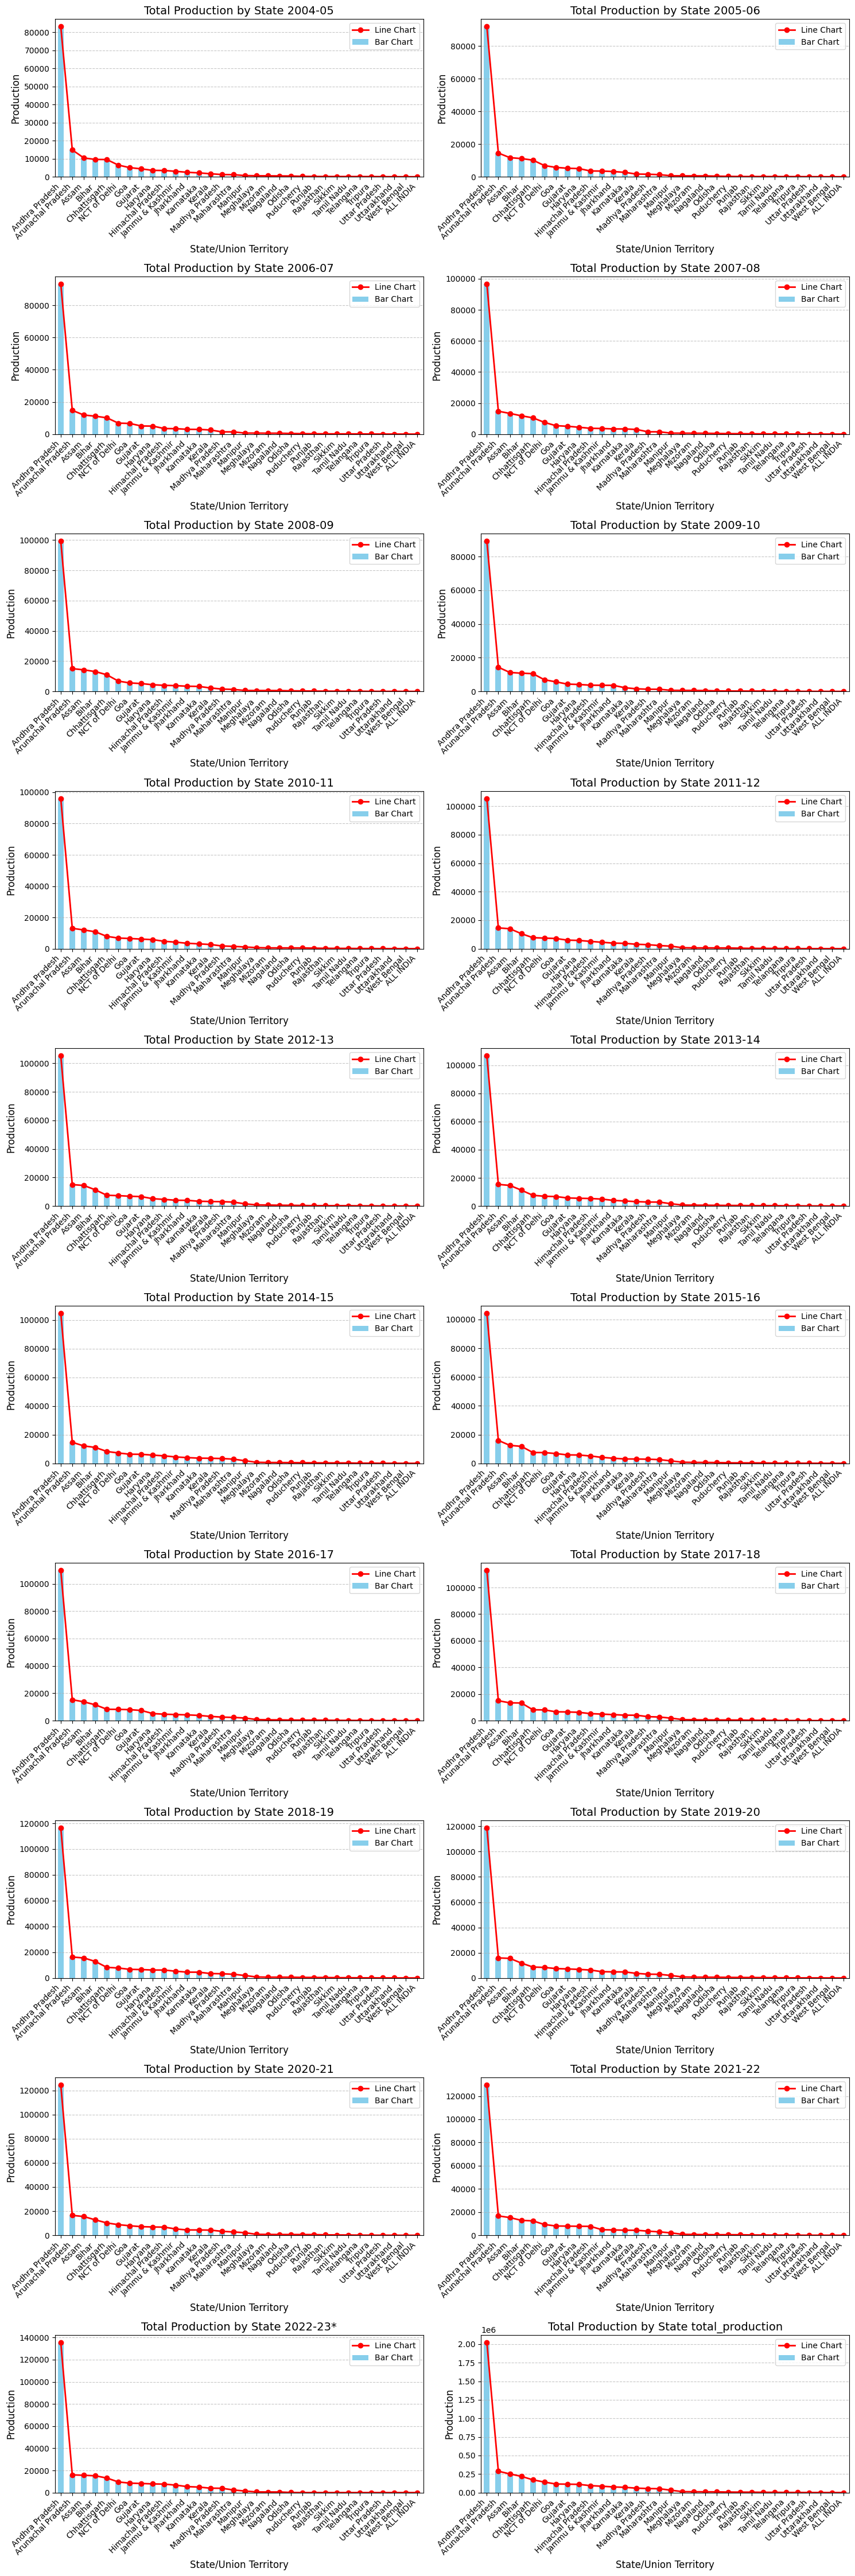

In [149]:
# Create subplots
fig, axes = plt.subplots(10, 2, figsize=(15, 45))

# Iterate over each year
for i, year_cols in enumerate(list(df3.columns)[1:]):
    ax = axes[i // 2, i % 2]

    # Group data by state and plot bar chart
    df3.groupby('State/Union Territory')[year_cols].sum().sort_values(ascending=False).plot(kind='bar', ax=ax, color='skyblue', label='Bar Chart')

    # Plot line chart for comparison
    df3.groupby('State/Union Territory')[year_cols].sum().sort_values(ascending=False).plot(kind='line', ax=ax, color='red', marker='o', linewidth=2, label='Line Chart')

    ax.set_title(f'Total Production by State {year_cols}', fontsize=14)
    ax.set_xlabel('State/Union Territory', fontsize=12)
    ax.set_ylabel('Production', fontsize=12)
    ax.set_xticklabels(df3['State/Union Territory'].to_list(), rotation=45, ha='right', fontsize=10)

    # Add legend
    ax.legend()

    # Add grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add some space between subplots
    plt.subplots_adjust(hspace=0.5)

plt.tight_layout()
plt.show()


### What is the state-wise rate of production?

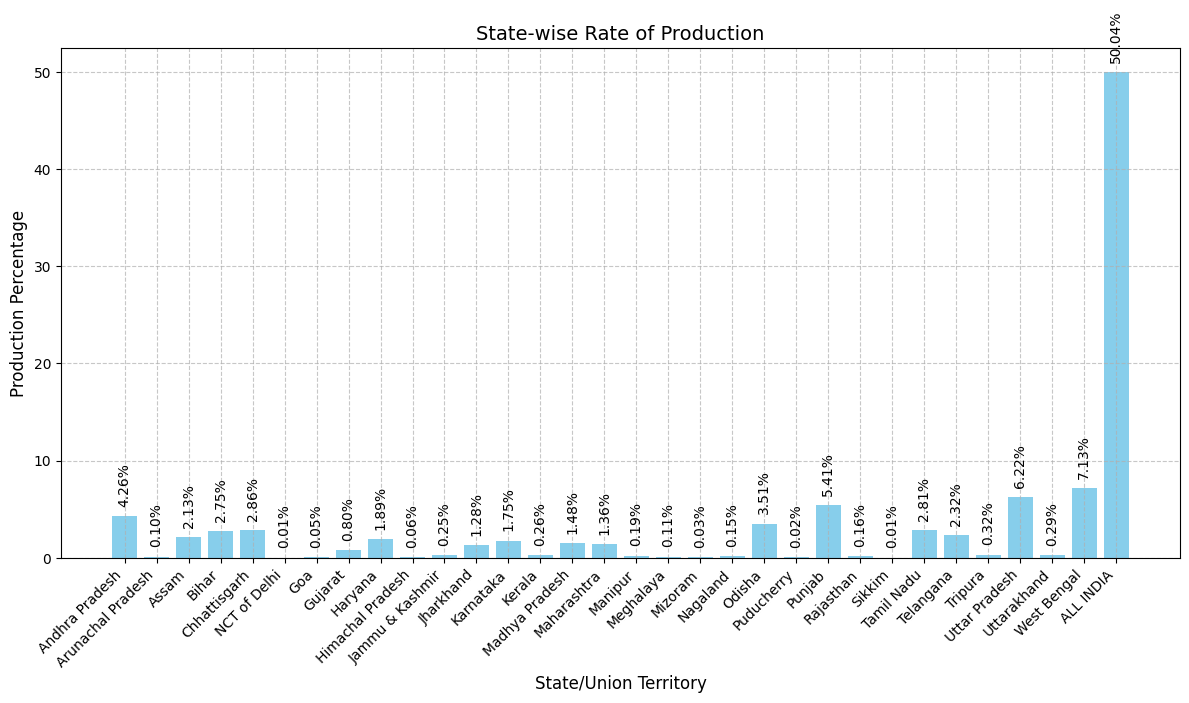

In [150]:
# Calculate the total production for each state
total_production = df3.iloc[:, 1:].sum(axis=1)

# Calculate the percentage of production for each state
state_production_percentage = (total_production / total_production.sum()) * 100

# Create a bar plot of the state-wise production percentage
plt.figure(figsize=(12, 8))  # Adjust figure size
bars = plt.bar(df3['State/Union Territory'], state_production_percentage, color='skyblue')

# Adding labels and title
plt.xlabel('State/Union Territory', fontsize=12)
plt.ylabel('Production Percentage', fontsize=12)
plt.title('State-wise Rate of Production', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding data labels on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.2f}%', ha='center', va='bottom', rotation=90)

# Adjust layout to prevent x-axis label overlapping
plt.tight_layout()

# Stagger x-axis labels
plt.subplots_adjust(bottom=0.3)  # Adjust bottom margin
plt.xticks(df3['State/Union Territory'], rotation=45, ha='right')

# Show plot
plt.show()


### For which provinces there is a need to improve their production of rice.

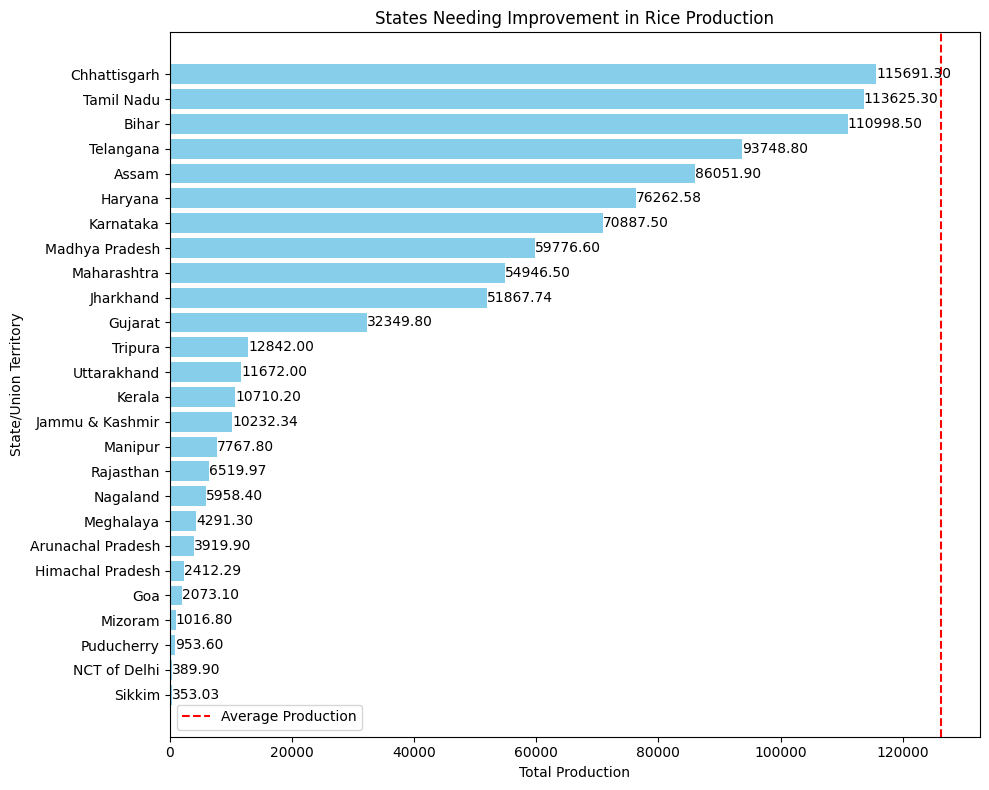

In [151]:

avg_production = df3['total_production'].mean()
states_to_improve = df3[df3['total_production'] < avg_production].sort_values('total_production')

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(states_to_improve['State/Union Territory'], states_to_improve['total_production'], color='skyblue')
plt.axvline(avg_production, color='red', linestyle='--', label='Average Production')
plt.xlabel('Total Production')
plt.ylabel('State/Union Territory')
plt.title('States Needing Improvement in Rice Production')
plt.legend()

# Adding annotations for values
for index, value in enumerate(states_to_improve['total_production']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()

# Model Building

In [152]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [153]:
X = df3.drop(["State/Union Territory", "2022-23*", 'total_production'], axis=1)
y = df3["2022-23*"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=143)

In [154]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [155]:
rfg_model = RandomForestRegressor(n_estimators=100, random_state=143)
rfg_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=143)

###### Model Evaluation


In [156]:
y_pred = rfg_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 985.3260259418826


###### Make Predictions for Next 5 Years (2023-24 to 2027-28)

In [157]:
future_years = ["2023-24", "2024-25", "2025-26", "2026-27", "2027-28"]
future_data = pd.DataFrame(columns=X.columns)

###### Assuming the future data is not available, we'll use the last available data for prediction


In [158]:
future_data

,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22


In [159]:
last_available_data = X.iloc[-1]
for year in future_years:
    future_data.loc[year] = last_available_data

In [160]:
future_data_scaled = scaler.transform(future_data)

In [161]:
future_data

,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22
2023-24,83131.7,91793.4,93355.3,96692.9,99182.5,89092.9,95979.8,105310.9,105231.6,106645.5,104798.5,104408.2,109698.4,112757.6,116477.8,118870.3,124368.3,129471.4
2024-25,83131.7,91793.4,93355.3,96692.9,99182.5,89092.9,95979.8,105310.9,105231.6,106645.5,104798.5,104408.2,109698.4,112757.6,116477.8,118870.3,124368.3,129471.4
2025-26,83131.7,91793.4,93355.3,96692.9,99182.5,89092.9,95979.8,105310.9,105231.6,106645.5,104798.5,104408.2,109698.4,112757.6,116477.8,118870.3,124368.3,129471.4
2026-27,83131.7,91793.4,93355.3,96692.9,99182.5,89092.9,95979.8,105310.9,105231.6,106645.5,104798.5,104408.2,109698.4,112757.6,116477.8,118870.3,124368.3,129471.4
2027-28,83131.7,91793.4,93355.3,96692.9,99182.5,89092.9,95979.8,105310.9,105231.6,106645.5,104798.5,104408.2,109698.4,112757.6,116477.8,118870.3,124368.3,129471.4


In [162]:
future_predictions = rfg_model.predict(future_data)
future_predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([95689.893, 95689.893, 95689.893, 95689.893, 95689.893])

In [163]:
print("Predictions for Next 5 Years:")
print("*"*29)
for year, prediction in zip(future_years, future_predictions):
    print(year, ":", prediction)

Predictions for Next 5 Years:
*****************************
2023-24 : 95689.89300000003
2024-25 : 95689.89300000003
2025-26 : 95689.89300000003
2026-27 : 95689.89300000003
2027-28 : 95689.89300000003
